In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [2]:
df= pd.read_csv('crtraindata.csv').set_index('ID')
df.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,...,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Creditability,Duration of the Credit,Credit Amount.1,Age
ID,,,,,,,,,,,,,,,,,,,,,
151,1,48,2,4,3051,1,3,3,3,1,...,2,1,3,1,1,1,0,2.22,-0.08,1.70
152,1,21,4,0,571,1,5,4,3,1,...,2,2,3,1,1,1,1,0.00,-0.93,2.69
153,1,18,2,3,1345,1,3,4,4,1,...,2,1,3,1,1,1,0,-0.25,-0.67,-0.81
154,1,15,2,9,806,1,3,4,2,1,...,2,1,2,1,1,1,1,-0.49,-0.85,-1.17
155,3,4,2,0,1494,5,2,1,3,1,...,2,1,2,2,1,2,1,-1.40,-0.62,-0.54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 151 to 950
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account Balance                    800 non-null    int64  
 1   Duration of Credit (month)         800 non-null    int64  
 2   Payment Status of Previous Credit  800 non-null    int64  
 3   Purpose                            800 non-null    int64  
 4   Credit Amount                      800 non-null    int64  
 5   Value Savings/Stocks               800 non-null    int64  
 6   Length of current employment       800 non-null    int64  
 7   Instalment per cent                800 non-null    int64  
 8   Sex & Marital Status               800 non-null    int64  
 9   Guarantors                         800 non-null    int64  
 10  Duration in Current address        800 non-null    int64  
 11  Most valuable available asset      800 non-null    int64

In [4]:
df = df.drop(columns=['Duration of Credit (month)','Age (years)','Credit Amount']) ## Dropping ' ID','Duration of Credit (month)','Age (years)','Credit Amount'

#Count number of Categorical 

categorical_columns = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent','Sex & Marital Status','Guarantors','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','No of Credits at this Bank','Occupation','No of dependents','Telephone','Foreign Worker']

In [5]:
#Count Numerical Columns as well
numerical_columns = ['Duration of the Credit', 'Credit Amount.1', 'Age']

In [6]:
print(categorical_columns)
print(numerical_columns)

['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 'Most valuable available asset', 'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker']
['Duration of the Credit', 'Credit Amount.1', 'Age']


# Univariate Analysis

### Categorical varibles

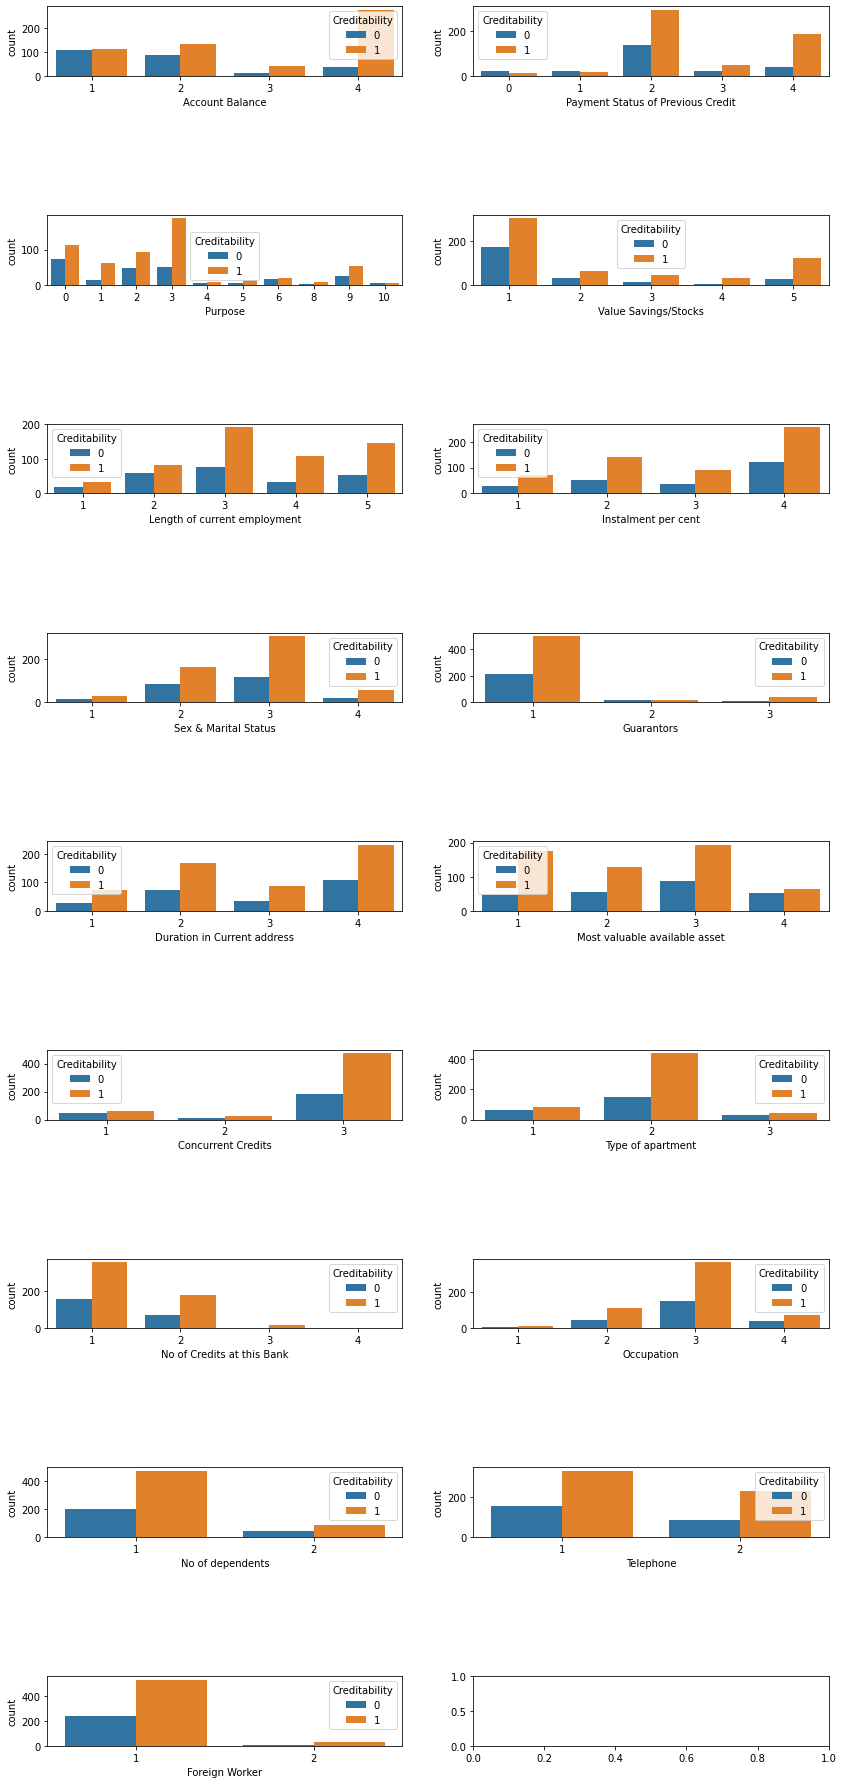

In [7]:
# Categorical varibles


fig,axes = plt.subplots(9,2,figsize=(14,32))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Creditability',ax=axes[row,col])


plt.subplots_adjust(hspace=2)


### Numeric Varibles

       Duration of the Credit  Credit Amount.1         Age
count              800.000000       800.000000  800.000000
mean                -0.000150         0.000250    0.001187
std                  0.999768         0.999964    0.999043
min                 -1.400000        -1.040000   -1.440000
25%                 -0.740000        -0.670000   -0.810000
50%                 -0.250000        -0.340000   -0.180000
75%                  0.250000         0.242500    0.540000
max                  4.200000         5.220000    3.590000


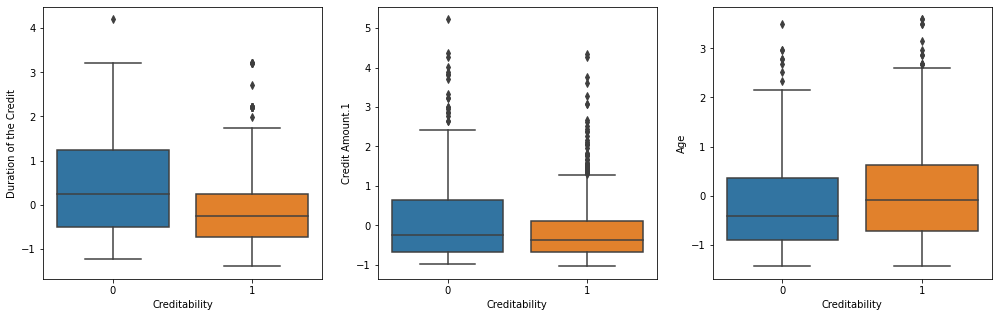

In [8]:

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Creditability',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# Bivariate Analysis

##### Merge the varible: Purposes

In [9]:
df['Purpose'].unique()

array([ 4,  0,  3,  9,  5,  2,  1,  8,  6, 10], dtype=int64)

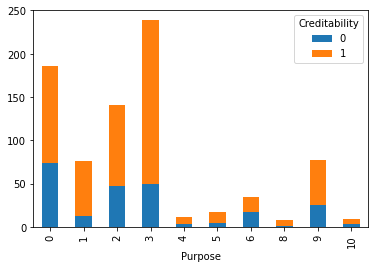

In [10]:
pd.crosstab(df['Purpose'], df['Creditability']).plot.bar(stacked=True)

In [11]:
df['Purpose'].value_counts()

3     239
0     186
2     141
9      77
1      76
6      35
5      17
4      12
10      9
8       8
Name: Purpose, dtype: int64

In [12]:
# crosstab table

pd.crosstab(df['Creditability'], df['Purpose']).style.set_caption("Crosstab: Creditability vs Purpose")

Purpose,0,1,2,3,4,5,6,8,9,10
Creditability,,,,,,,,,,
0,74,13,47,50,4,5,17,1,25,4
1,112,63,94,189,8,12,18,7,52,5


In [13]:
# Check out the Approval Ratio of each purpose, and merge the purposes through proportion
df.groupby(['Purpose'])['Creditability'].agg(['mean','sum'])

,mean,sum
Purpose,,
0,0.602151,112
1,0.828947,63
2,0.666667,94
3,0.790795,189
4,0.666667,8
5,0.705882,12
6,0.514286,18
8,0.875000,7
9,0.675325,52


In [14]:
purpose_dict = {
    
    0:'60%-70%ApproalRatePurposes',
    2:'60%-70%ApproalRatePurposes', 
    4:'60%-70%ApproalRatePurposes', 
    5:'60%-70%ApproalRatePurposes', 
    9:'60%-70%ApproalRatePurposes',
    1:'>=80%ApproalRatePurposes', 
    3:'>=80%ApproalRatePurposes',
    8:'>=80%ApproalRatePurposes',
    6:'<60%ApproalRatePurposes',
    10:'<60%ApproalRatePurposes'
}
df['Purpose'] =df['Purpose'].apply(lambda x: purpose_dict[x])
  


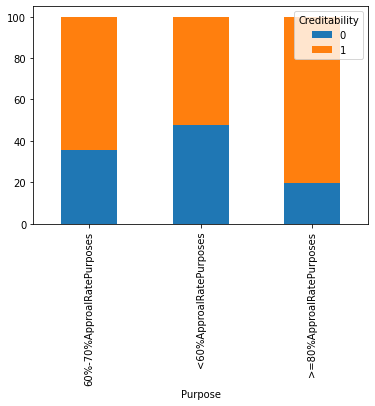

In [15]:
pd.crosstab(df['Purpose'], df['Creditability']).apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True)


In [16]:

pd.crosstab(df['Creditability'], df['Purpose']).style.set_caption("Crosstab: Creditability vs Purpose")

Purpose,60%-70%ApproalRatePurposes,<60%ApproalRatePurposes,>=80%ApproalRatePurposes
Creditability,,,
0,155,21,64
1,278,23,259


In [17]:
df['Purpose'].value_counts()

60%-70%ApproalRatePurposes    433
>=80%ApproalRatePurposes      323
<60%ApproalRatePurposes        44
Name: Purpose, dtype: int64

In [18]:
df.groupby(['Purpose'])['Creditability'].agg(['mean','sum'])

,mean,sum
Purpose,,
60%-70%ApproalRatePurposes,0.642032,278
<60%ApproalRatePurposes,0.522727,23
>=80%ApproalRatePurposes,0.801858,259


# Dummies (One-hot encoding)

In [19]:
df.columns


Index(['Account Balance', 'Payment Status of Previous Credit', 'Purpose',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank',
       'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker',
       'Creditability', 'Duration of the Credit', 'Credit Amount.1', 'Age'],
      dtype='object')

In [20]:
cat_list = ['Account Balance', 
            'Payment Status of Previous Credit', 
            'Purpose', 
            'Value Savings/Stocks',
            'Length of current employment',
            'Instalment per cent',
            'Sex & Marital Status',
            'Guarantors','Duration in Current address',
            'Most valuable available asset',
            'Concurrent Credits',
            'Type of apartment',
            'No of Credits at this Bank',
            'Occupation',
            'No of dependents',
            'Telephone',
            'Foreign Worker',
           'Creditability']
drop_list = ['Account Balance', 
            'Payment Status of Previous Credit', 
            'Purpose', 
            'Value Savings/Stocks',
            'Length of current employment',
            'Instalment per cent',
            'Sex & Marital Status',
            'Guarantors','Duration in Current address',
            'Most valuable available asset',
            'Concurrent Credits',
            'Type of apartment',
            'No of Credits at this Bank',
            'Occupation',
            'No of dependents',
            'Telephone',
            'Foreign Worker',
           'Creditability']

In [21]:
for cat in cat_list:
    df = df.merge(pd.get_dummies(df[cat], drop_first=False, prefix=cat), left_index=True, right_index=True)

In [22]:
df.drop(drop_list, axis= 1, inplace = True)

In [23]:
df.head()

,Duration of the Credit,Credit Amount.1,Age,Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,...,Occupation_3,Occupation_4,No of dependents_1,No of dependents_2,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2,Creditability_0,Creditability_1
ID,,,,,,,,,,,,,,,,,,,,,
151,2.22,-0.08,1.70,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
152,0.00,-0.93,2.69,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
153,-0.25,-0.67,-0.81,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
154,-0.49,-0.85,-1.17,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
155,-1.40,-0.62,-0.54,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1


In [24]:
df.to_csv("SuperCleanedData.csv")

In [146]:
df= pd.read_csv('superdata.csv')
df.head()

,Duration of the Credit,Credit Amount.1,Age,Account Balance_<0,Account Balance_0-200,Account Balance_>=200,Account Balance_no account,Payment Status of Previous Credit_no credit taken,Payment Status of Previous Credit_all paid,Payment Status of Previous Credit_exsitings paid,...,No of Credits at this Bank_>6,Occupation_unemployed,Occupation_unskilled,Occupation_skilled,Occupation_management,No of dependents_<3,No of dependents_>=3,"Telephone_yes,registed",Foreign Worker_yes,Creditability_Approval
0,2.22,-0.08,1.70,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,0.00,-0.93,2.69,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
2,-0.25,-0.67,-0.81,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,-0.49,-0.85,-1.17,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,1
4,-1.40,-0.62,-0.54,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1


# Correlations

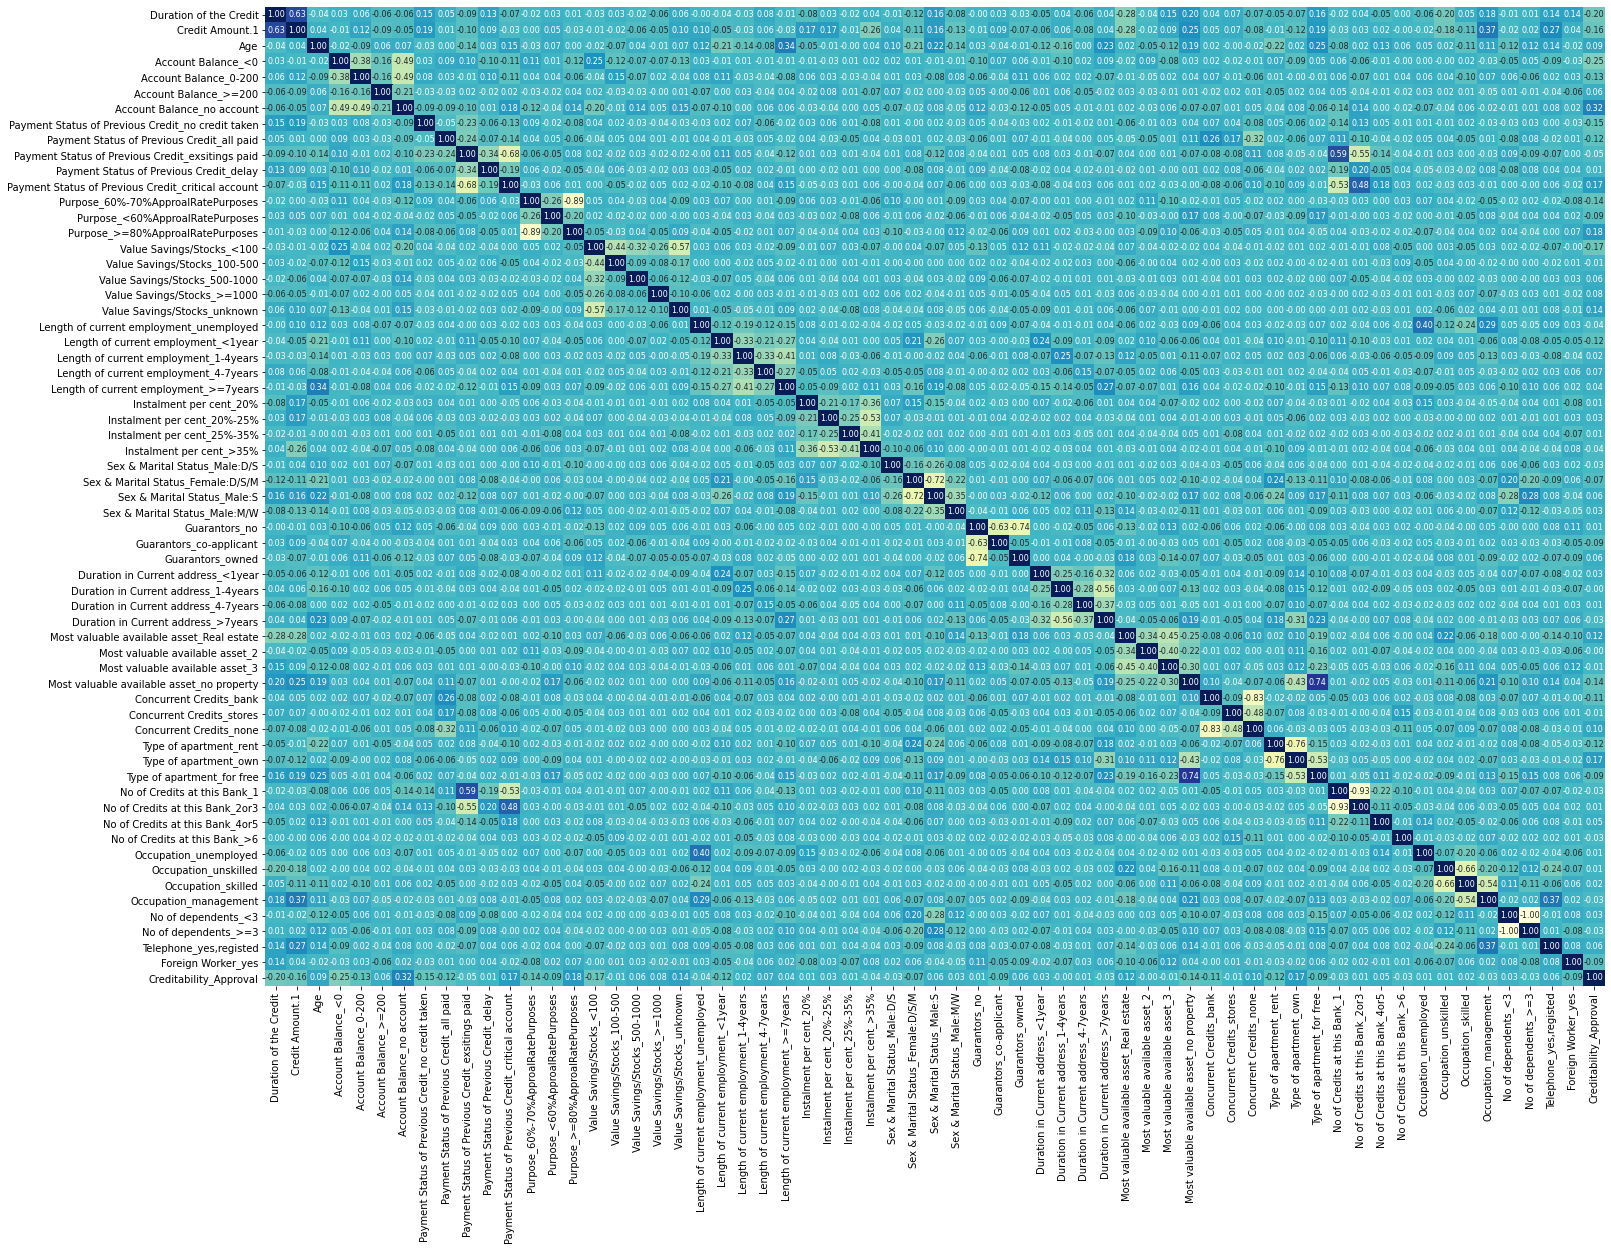

In [76]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),
            cmap='YlGnBu',
            annot=True,
            fmt=".2f",
            annot_kws={'size':8},
            cbar=False)

In [147]:
df = df.drop(columns=['Occupation_skilled','Length of current employment_>=7years','Telephone_yes,registed','No of Credits at this Bank_1','No of Credits at this Bank_2or3','No of dependents_<3','No of dependents_>=3','Duration in Current address_4-7years','Most valuable available asset_3','Age','Concurrent Credits_bank','Duration in Current address_>7years','Purpose_60%-70%ApproalRatePurposes','Length of current employment_unemployed','Instalment per cent_25%-35%','Guarantors_no','Sex & Marital Status_Male:D/S','Length of current employment_4-7years','Length of current employment_unemployed','Occupation_unskilled','Value Savings/Stocks_500-1000','Guarantors_co-applicant','Concurrent Credits_stores']) 

# Train-Test data split


In [148]:
y = df['Creditability_Approval']
x = df.drop('Creditability_Approval', axis=1)


In [149]:
from sklearn.model_selection import train_test_split

data_splits = train_test_split(x, y, 
                               test_size=0.30, 
                               random_state=0,
                               shuffle=True, 
                               stratify=y
                              )

x_train, x_test, y_train, y_test = data_splits

In [150]:
# check splitted data
list(map(lambda x: x.shape, [x, y, x_train, x_test, y_train, y_test]))

[(800, 40), (800,), (560, 40), (240, 40), (560,), (240,)]

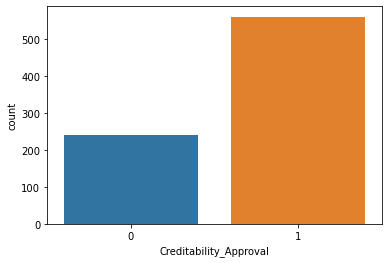

In [151]:
# check distribution of train and test data
sns.countplot(x=y)

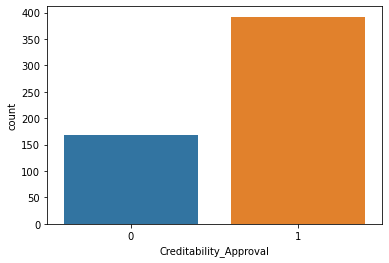

In [152]:
#y_train
sns.countplot(x=y_train)

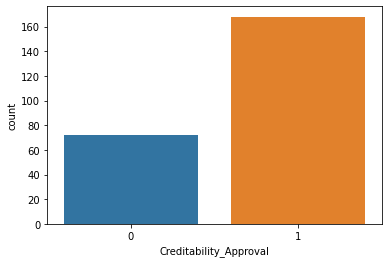

In [153]:
#y_test
sns.countplot(x=y_test)

# Model building


In [157]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.748214 (0.068209)
LDA: 0.758929 (0.059628)
KNN: 0.732143 (0.106246)
CART: 0.669643 (0.101566)
NB: 0.717857 (0.093746)
RF: 0.748214 (0.091386)
SVM: 0.746429 (0.061756)


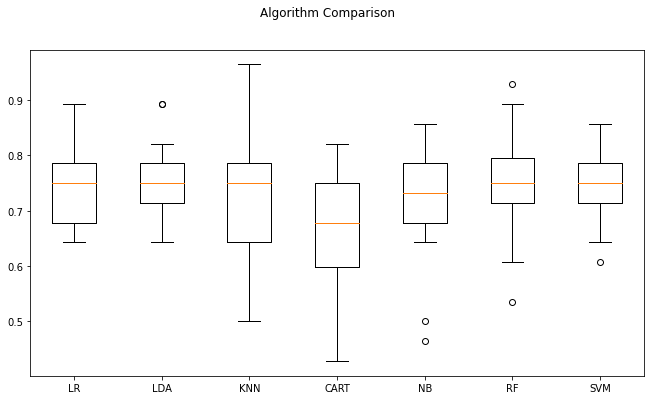

In [158]:
# to feed the random state
seed = 100

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
        kfold = KFold(n_splits=20, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [159]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [160]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [161]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs,
                                 drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [162]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(x=r, y=p, ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(x=thresh, y=p, label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(x=thresh, y=r, color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [163]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [164]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [165]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))


In [166]:
def report(clf, x_train, y_train, x_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                      sample_weight=sample_weight,
                                      refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_probs)
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions),
                                      func(y_test, test_predictions)]
        
    ## Model Memory
    model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [167]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='accuracy'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], roc_auc] + \
                              true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

# Logistic Regression Model Fitting

In [168]:
from sklearn.metrics import accuracy_score
primary_eval_metric = accuracy_score

confusion_lbs = ['Bad', 'Good']

LogisticRegressionCV(cv=6, max_iter=500, n_jobs=-1, random_state=0,
                     scoring='accuracy', solver='liblinear')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 560 samples
 Test Size: 240 samples
---------------------------------------------
Training Time: 1.874 seconds
 Testing Time: 0.002 seconds
---------------------------------------------
Train Accuracy:  0.7946428571428571
 Test Accuracy:  0.7541666666666667
---------------------------------------------
Train Accuracy Score:  0.7946428571428571
 Test Accuracy Score:  0.7541666666666667

---------------------------------------------
 Area Under ROC (test):  0.7611607142857143
---------------------------------------------
Model Memory Size: 21.46 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

         Bad       0.63      0.44      0.52        72
        Good   

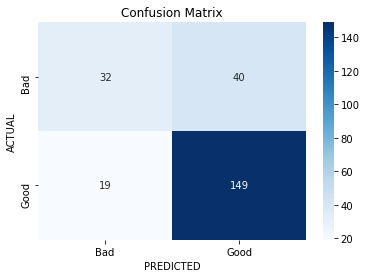


=======================================> PLOTS <=========================================


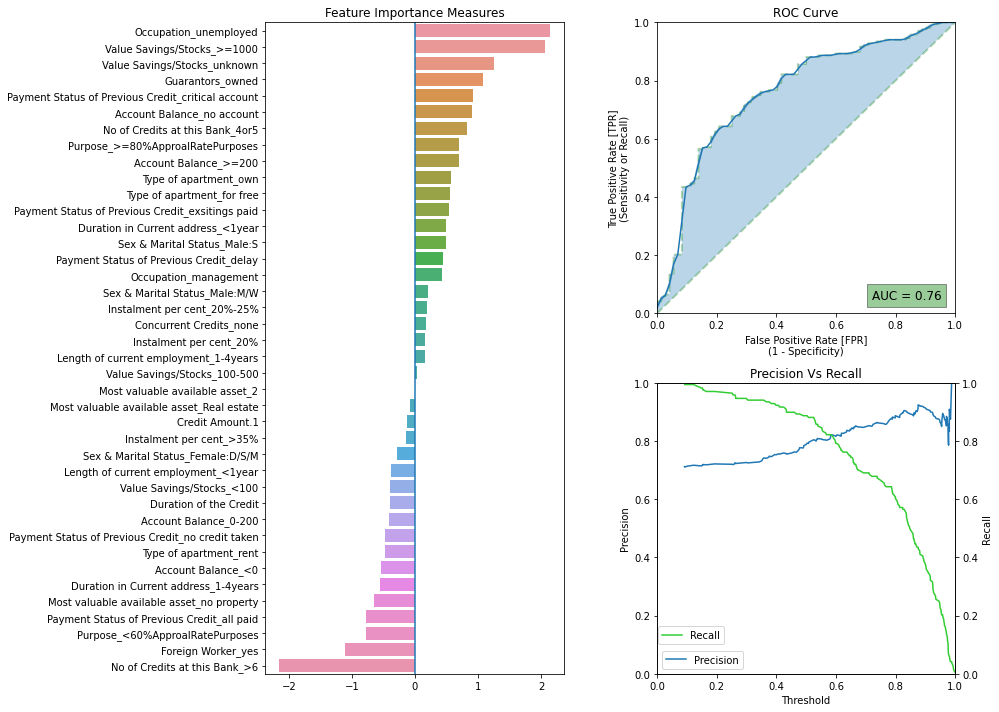

In [169]:
from sklearn.linear_model import LogisticRegressionCV
feature_names = x_train.columns
logit_cv = LogisticRegressionCV(cv=6,
                                max_iter=500, 
                                penalty='l2',
                                scoring='accuracy', 
                                solver='liblinear',
                                n_jobs=-1, random_state=0,
                                refit=True, verbose=0)

logit_cv, logit_report = report(logit_cv, x_train, y_train,
                                x_test, y_test,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=feature_names.tolist(),
                                confusion_labels=confusion_lbs)

In [71]:
df = df.drop(columns=['Duration in Current address_4-7years','Most valuable available asset_3','Age','Concurrent Credits_bank','Duration in Current address_>7years','Purpose_60%-70%ApproalRatePurposes','Length of current employment_unemployed','Instalment per cent_25%-35%','Guarantors_no','Sex & Marital Status_Male:D/S']) 

# Random Forest

RandomForestClassifier(class_weight='balanced', max_depth=2, max_samples=0.63,
                       n_estimators=110, n_jobs=-1, random_state=100)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 560 samples
 Test Size: 240 samples
---------------------------------------------
Training Time: 0.194 seconds
 Testing Time: 0.025 seconds
---------------------------------------------
Train Accuracy:  0.7357142857142858
 Test Accuracy:  0.7416666666666667
---------------------------------------------
Train Accuracy Score:  0.7357142857142858
 Test Accuracy Score:  0.7416666666666667

---------------------------------------------
 Area Under ROC (test):  0.7837301587301588
---------------------------------------------
Model Memory Size: 88.17 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

         Bad       0.55      0.71      0.62      

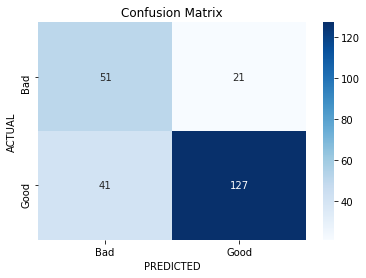


=======================================> PLOTS <=========================================


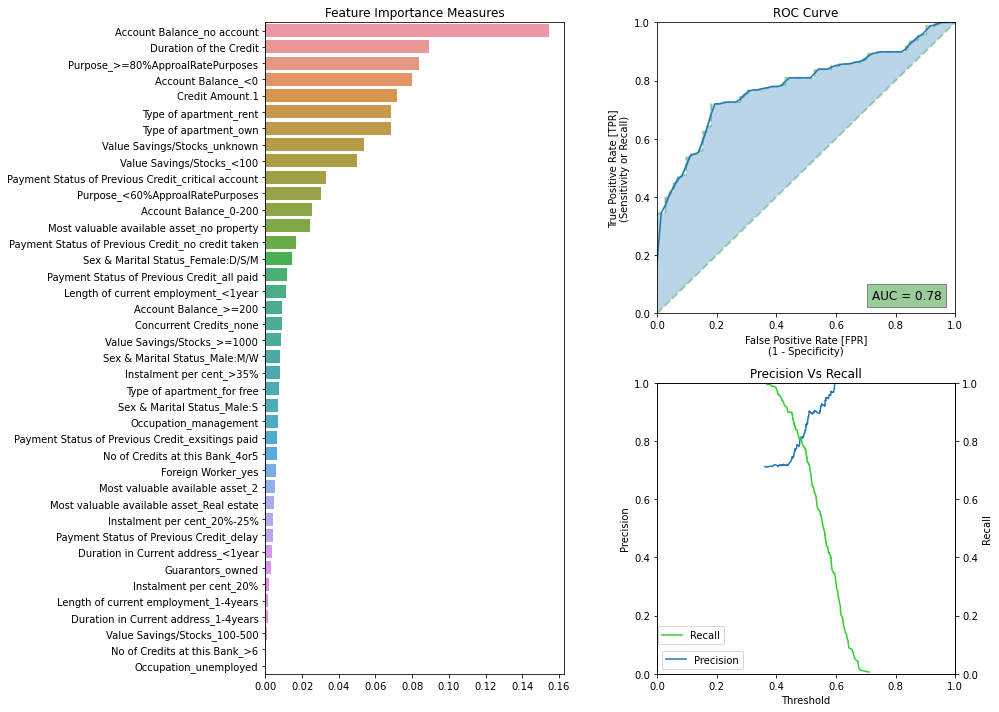

In [170]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
                                    class_weight='balanced',
#                                        criterion='entropy',
                                       max_depth=2, max_samples=0.63, n_estimators=110,
                                       n_jobs=-1, 
                                       random_state=seed)

random_forest, random_forest_report = report(random_forest, x_train, y_train,
                                             x_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names.tolist(),
                                             confusion_labels=confusion_lbs)

# Model Optimization

In [171]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]# Number of trees in random forest
max_features = ['auto', 'sqrt']# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]# Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_forest = RandomForestClassifier(random_state = seed)
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, 
                               n_iter = 50, # Number of parameter settings that are sampled. 
                               cv = 5, 
                               verbose=4,  # message details
                               scoring='accuracy',  # maximising accuracy
                               random_state=seed, 
                               n_jobs = -1  #Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 
                              )
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.0min finished


{'n_estimators': 1788,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

RandomForestClassifier(max_depth=80, max_features='sqrt', n_estimators=1788,
                       random_state=100)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 560 samples
 Test Size: 240 samples
---------------------------------------------
Training Time: 3.198 seconds
 Testing Time: 0.216 seconds
---------------------------------------------
Train Accuracy:  1.0
 Test Accuracy:  0.75
---------------------------------------------
Train Accuracy Score:  1.0
 Test Accuracy Score:  0.75

---------------------------------------------
 Area Under ROC (test):  0.7777364417989419
---------------------------------------------
Model Memory Size: 37144.64 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

         Bad       0.64      0.38      0.47        72
        Good       0.77      0.91      0.84       168

    accuracy              

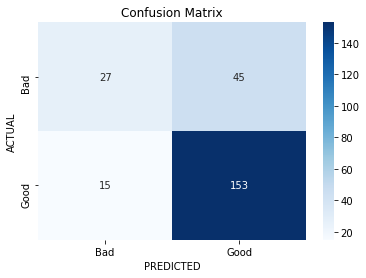


=======================================> PLOTS <=========================================


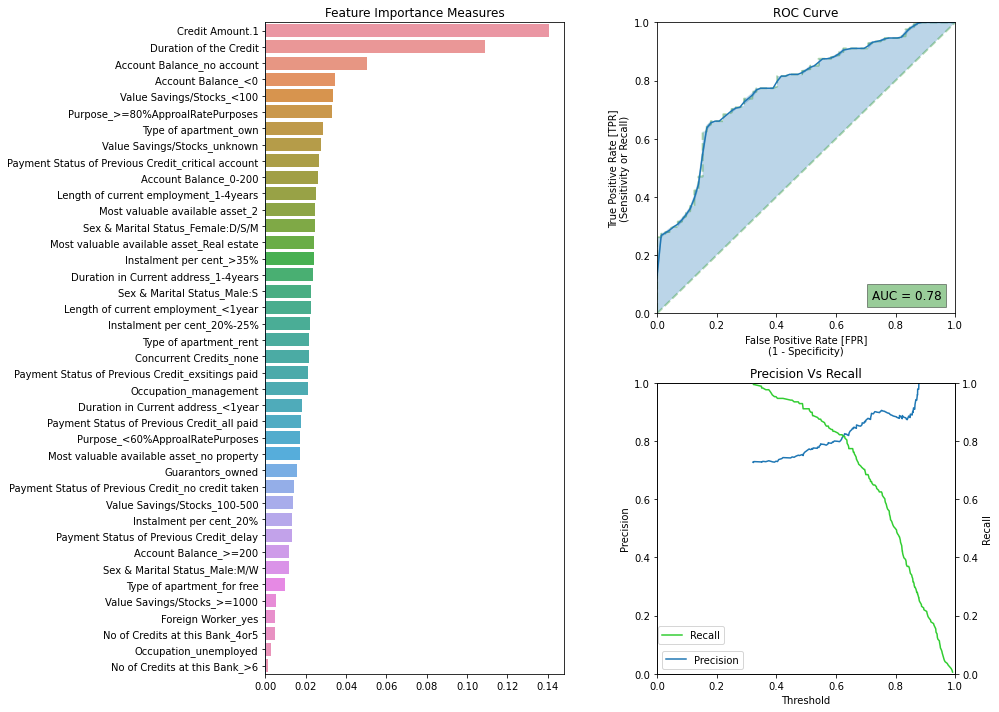

In [172]:
rf_params = rf_random.best_params_

random_forest.set_params(**rf_params)

random_forest, random_forest_report = report(random_forest, x_train, y_train,
                                             x_test, y_test,
                                             display_scores=[primary_eval_metric],
                                             importance_plot=True,
                                             feature_labels=feature_names.tolist(),
                                             confusion_labels=confusion_lbs)

In [173]:
report_list = [logit_report, 
               random_forest_report]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]

In [174]:
# model comparison

compare_table, compare_plot = compare_models(y_test, clf_reports=report_list,
                                             labels=clf_labels,
                                             score=primary_eval_metric.__name__)

compare_table.sort_values(by=['Overfitting', 'F1-score'], ascending=[True, False])

,Train accuracy_score,Test accuracy_score,Overfitting,ROC Area,Precision,Recall,F1-score,Support
RandomForestClassifier,1,0.75,True,0.777736,0.772727,0.910714,0.836066,168
LogisticRegressionCV,0.795,0.754,True,0.761161,0.78836,0.886905,0.834734,168


# Normal logistic regression

In [54]:
from sklearn.metrics import confusion_matrix, f1_score

logit_cv = LogisticRegressionCV(cv=5,
                                class_weight='none',
                                max_iter=500, penalty='l2',
                                scoring='accuracy', solver='liblinear',
                                n_jobs=-1, random_state=0,
                                refit=True, verbose=0)

In [55]:
logit_cv.fit(x_train, y_train)

LogisticRegressionCV(class_weight='none', cv=5, max_iter=500, n_jobs=-1,
                     random_state=0, scoring='accuracy', solver='liblinear')

In [56]:
y_pred = logit_cv.predict(x_test)

In [57]:
matrix = confusion_matrix(y_test,y_pred)

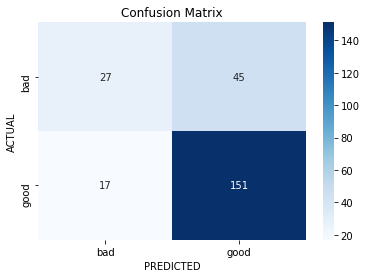

In [58]:
confusion_plot(matrix, labels=['bad', 'good'])

In [59]:
f1_score(y_test,y_pred)

0.8296703296703296

# Penalizing false prediction of 'bad'

In [175]:
weights = {
    # correct - 0
    0: 5,  # bad
    1: 1   # good
}

In [176]:
from sklearn.metrics import confusion_matrix

logit_cv = LogisticRegressionCV(cv=5,
                                class_weight=weights,
                                max_iter=500, penalty='l2',
                                scoring='accuracy', 
                                solver='liblinear',
                                n_jobs=-1, random_state=31,
                                refit=True, verbose=0)

In [177]:
logit_cv.fit(x_train, y_train)

LogisticRegressionCV(class_weight={0: 5, 1: 1}, cv=5, max_iter=500, n_jobs=-1,
                     random_state=31, scoring='accuracy', solver='liblinear')

In [178]:
y_pred = logit_cv.predict(x_test)

In [179]:
matrix = confusion_matrix(y_test,y_pred)

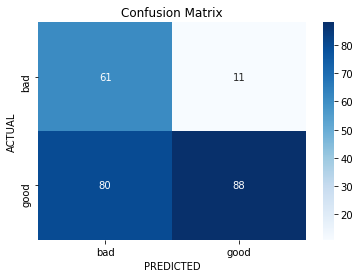

In [180]:
confusion_plot(matrix, labels=['bad', 'good'])

In [181]:
f1_score(y_test,y_pred)

0.6591760299625469

In [67]:
df_finaltest=pd.read_csv('FinalDataTest.csv').set_index('ID')

In [68]:
df_finaltest

,Duration,Credit Amount,Age,Account Balance_<0,Account Balance_0-200,Account Balance_>=200,Payment Status of Previous Credit_all paid,Payment Status of Previous Credit_exsitings paid,Payment Status of Previous Credit_delay,Payment Status of Previous Credit_critical account,...,Type of apartment_own,No of Credits at this Bank_2or3,No of Credits at this Bank_4or5,No of Credits at this Bank_>6,Occupation_unskilled,Occupation_skilled,Occupation_management,No of dependents_>=3,"Telephone_yes,registed",Foreign Worker_yes
ID,,,,,,,,,,,,,,,,,,,,,
1,0.362436,-0.297937,-0.339875,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,1,1
2,-0.429293,0.638440,-0.593513,0,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,0,1
3,0.714316,-0.141467,-0.678059,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,1,1,1
4,0.362436,3.866456,0.590131,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
5,0.362436,-0.641439,0.505585,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-0.429293,0.796540,1.858320,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,1
147,-0.693203,1.104591,1.012860,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
148,-0.693203,-0.341945,0.759223,0,0,1,0,1,0,0,...,1,1,0,0,0,1,0,1,1,1


In [69]:
predictions = random_forest.predict(df_finaltest)

ValueError: Number of features of the model must match the input. Model n_features is 58 and input n_features is 49 

In [ ]:
x_test.to_csv("prediction1.csv")

In [ ]:
test_df=pd.read_csv('prediction1.csv')
test_df.head()

In [ ]:
submission = pd.DataFrame({'Id':test_df['ID'],'Prediction':predictions})


submission.head()

In [ ]:
submission.to_csv("p1.csv")